## This notebook performs a simple visualization of the LLC2160 data using the OpenVisus framework.

## **Step 1: Importing the libraries**

In [8]:
import numpy as np
import openvisuspy as ovp
import matplotlib.pyplot as plt
import os
os.environ['VISUS_CACHE']= "./visus_can_be_deleted"

## **Step 2: Reading the metadata file from cloud**
In this section, we define the url locations of the three velocity fields (u, v, w) of the dataset. We then load this data with `LoadDataset`.

In [10]:
# LLC2160 data
u_url = "https://maritime.sealstorage.io/api/v0/s3/utah/nasa/dyamond/mit_output/llc2160_arco/visus.idx?access_key=any&secret_key=any&endpoint_url=https://maritime.sealstorage.io/api/v0/s3&cached=arco"
w_url = "https://maritime.sealstorage.io/api/v0/s3/utah/nasa/dyamond/mit_output/llc2160_w/llc2160_w.idx?access_key=any&secret_key=any&endpoint_url=https://maritime.sealstorage.io/api/v0/s3&cached=arco"
v_url = "https://maritime.sealstorage.io/api/v0/s3/utah/nasa/dyamond/mit_output/llc2160_v/v_llc2160_x_y_depth.idx?access_key=any&secret_key=any&endpoint_url=https://maritime.sealstorage.io/api/v0/s3&cached=arco"

urls = [u_url, w_url, v_url]

In [13]:
dbs =  {}
for url in urls:
    db=ovp.LoadDataset(url)
    print(f'Dimensions: {db.getLogicBox()[1][0]}*{db.getLogicBox()[1][1]}*{db.getLogicBox()[1][2]}')
    print(f'Total Timesteps: {len(db.getTimesteps())}')
    field = db.getField().name
    print(f'Field: {field}')
    print('Data Type: float32')
    dbs[field] = db

Dimensions: 8640*6480*90
Total Timesteps: 10366
Field: u
Data Type: float32
Dimensions: 8640*6480*90
Total Timesteps: 10366
Field: w
Data Type: float32
Dimensions: 8640*6480*90
Total Timesteps: 10366
Field: v
Data Type: float32


## **Step 3:  Data Selection**
This section shows you how to load the data you want. You can select any timestep, region (x,y,z) you want. You can set the quality or resolution of the data as well. Higher quality means the finer(more) data. Not setting any time means the first timestep available is retrieved. Not setting quality means full data, which takes a while to load because of the higher filesize. We choose quality=-24 here to reduce the number of data points and so the 3D visual will not be too cluttered.

In [33]:
data = {}
for key in dbs:
    data[key] = dbs[key].db.read(time=0, quality=-24)
    print(f"{key} shape: {data[key].shape}")

u shape: (1, 13, 34)
w shape: (1, 13, 34)
v shape: (1, 13, 34)


The data retrieved is in a numpy.ndarray format.

In [26]:
type(data['u'])

numpy.ndarray

## **Step 4:  Visualize the data**
We are using a simple matplotlib here. We create a 3D visualization of each of the velocity vectors by using quivers from matplotlib. We also plot a scatter plot at every data point so that we can see the origin of the vectors and vectors with magnitude zero are not lost.

In [29]:
from mpl_toolkits.mplot3d import Axes3D

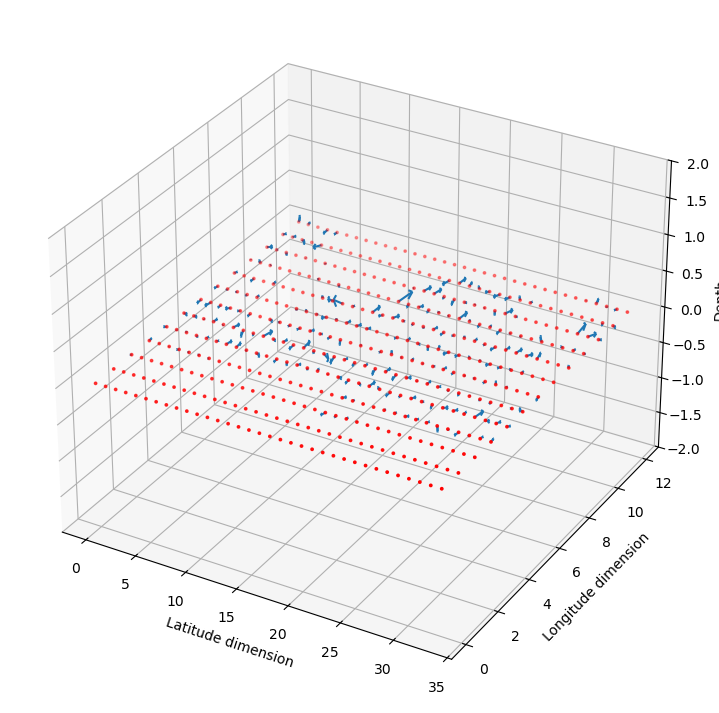

In [38]:
u = data['u']
v = data['v']
w = data['w']

depth_indices = np.arange(u.shape[0], dtype=int)
height_indices = np.arange(u.shape[1], dtype=int)
width_indices = np.arange(u.shape[2], dtype=int)

# create meshgrid
z, y, x = np.meshgrid(depth_indices, height_indices, width_indices, indexing='ij')

# plot
fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111, projection='3d')

ax.quiver(x, y, z, u, v, w) # velocity vectors
ax.scatter(x, y, z, color='red', s=3, label='Arrow origins') # vector origins

ax.set_xlabel('Latitude dimension')
ax.set_ylabel('Longitude dimension')
ax.set_zlabel('Depth')
ax.set_zlim(-2, 2)

plt.show()